In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import Matern

In [333]:
#Setting up the data
np.random.seed(0)

xmin = 0.5
xmax = 2
d = 20
grid = np.linspace(xmin, xmax, d)

num_samples = 30 #number of data samples used to fit the GP
num_params = d

true_lamb = 1.3
f = lambda x : np.exp(2 * x)
data = np.random.exponential(scale=1/f(grid), size=(num_samples, d)).T #data[i,j] where i=1...d, j=1...num_samples

In [344]:
#setting up the prior mean and covariance on theta
theta_prior_mean = np.ones(d)

magnitude = 5
length_scale = 0.5
nu = 5/2

kernel = magnitude * Matern(length_scale=length_scale, nu=nu)
theta_prior_cov = kernel(grid.reshape(-1,1))

#transform priors to natural parameters
eta_prior_mean = -theta_prior_mean
eta_prior_cov = theta_prior_cov


#Compute Lambda and Nu
Lambda_n = (1/num_samples) * sum(data[:, j].reshape(-1,1) @ data[:, j].reshape(1,-1) for j in range(num_samples))
Nu_n = (2*d + 1) * data.mean(axis=1)

#Compute Posterior mean and variance
eta_post_cov = np.linalg.inv(np.linalg.inv(eta_prior_cov) + 2 * num_samples * Lambda_n)
eta_post_mean = eta_post_cov @ (np.linalg.inv(eta_prior_cov) @ eta_prior_mean - num_samples * Nu_n)

#Convert back to original parameters
theta_post_mean = -eta_post_mean
theta_post_cov = eta_post_cov

#compute predictions and errors
pred = 1/theta_post_mean

err = 2 * (1/theta_post_mean**2) * np.sqrt(np.diagonal(theta_post_cov))

(0.0, 0.5)

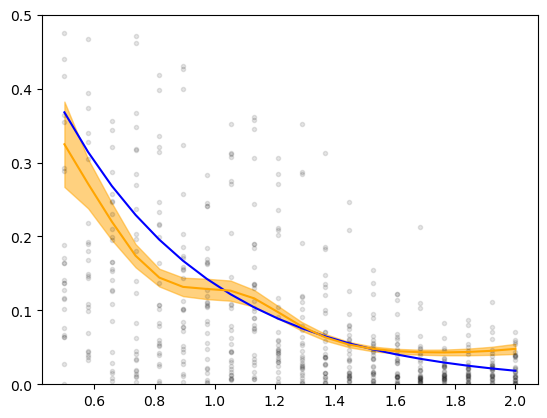

In [345]:
plt.plot(grid, data, '.', color='black', alpha=0.1)
plt.plot(grid, 1/f(grid), label="True Mean", color='blue')
plt.plot(grid, pred, label="Predicted Mean", color='orange')
plt.fill_between(grid, pred - err, pred + err, color='orange', alpha=0.5)
plt.ylim(0,0.5)